In [55]:
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/labeled_data.csv')
df.shape

(24783, 7)

In [3]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
# 0 - hate speech 1 - offensive language 2 - neither
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [5]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], inplace = True, axis = 1)

In [7]:
df.columns

Index(['class', 'tweet'], dtype='object')

In [8]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
df.isna().sum()

,0
class,0
tweet,0


In [10]:
df['tweet'].iloc[1000]

'&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;"@betysweetcocker: That pussy is just....&#128561; imma assume she just had a baby like..the day before"'

In [11]:
## Remove the Unwanted symbols and numbers from tweet column
df['process_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z\s]', '', regex = True)

In [12]:
df['process_tweet'].iloc[1000]

'betysweetcocker That pussy is just imma assume she just had a baby likethe day before'

In [13]:
df.drop(columns=['tweet'], inplace=True)

In [14]:
df.head()

,class,process_tweet
0,2,RT mayasolovely As a woman you shouldnt compl...
1,1,RT mleew boy dats coldtyga dwn bad for cuffin...
2,1,RT UrKindOfBrand Dawg RT sbabylife You ever f...
3,1,RT CGAnderson vivabased she look like a tranny
4,1,RT ShenikaRoberts The shit you hear about me ...


In [15]:
nlp = spacy.load('en_core_web_sm')

In [16]:
#lemmatization
def lemmatization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)


In [17]:
df['lemma_tweet'] = df['process_tweet'].apply(lemmatization)

In [18]:
df.head()

,class,process_tweet,lemma_tweet
0,2,RT mayasolovely As a woman you shouldnt compl...,RT mayasolovely as a woman you should not co...
1,1,RT mleew boy dats coldtyga dwn bad for cuffin...,RT mleew boy dat coldtyga dwn bad for cuffin...
2,1,RT UrKindOfBrand Dawg RT sbabylife You ever f...,RT UrKindOfBrand Dawg RT sbabylife you ever ...
3,1,RT CGAnderson vivabased she look like a tranny,RT CGAnderson vivabase she look like a tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [19]:
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords_list = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stopwords_list)

In [20]:
df['final_tweet'] = df['lemma_tweet'].apply(remove_stopwords)

In [21]:
df.head()

,class,process_tweet,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldnt compl...,RT mayasolovely as a woman you should not co...,RT mayasolovely woman complain clean house ...
1,1,RT mleew boy dats coldtyga dwn bad for cuffin...,RT mleew boy dat coldtyga dwn bad for cuffin...,RT mleew boy dat coldtyga dwn bad cuffin da...
2,1,RT UrKindOfBrand Dawg RT sbabylife You ever f...,RT UrKindOfBrand Dawg RT sbabylife you ever ...,RT UrKindOfBrand Dawg RT sbabylife fuck bit...
3,1,RT CGAnderson vivabased she look like a tranny,RT CGAnderson vivabase she look like a tranny,RT CGAnderson vivabase look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [24]:
#one - hot representation
vocab_size = 10000
one_hot_representation = [one_hot(words, vocab_size) for words in df['final_tweet']]

In [26]:
#padding the sequences
sentence_length =20
embedded_tweet = pad_sequences(one_hot_representation, padding = 'post', maxlen = sentence_length)

In [28]:
X = np.array(embedded_tweet)
y = np.array(df['class'])

In [31]:
#Upsampling the minority Sample
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

In [33]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
X_train.shape

(34034, 20)

In [35]:
X_test.shape

(8509, 20)

In [42]:
#Creating the model
dimension = 50

model = keras.Sequential([
    # Embedding layer
    keras.layers.Embedding(vocab_size, dimension, input_length=sentence_length),

    # LSTM layers
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),

    # Output layer
    keras.layers.Dense(3, activation='softmax')
])

#compiling the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [44]:
model.build(input_shape=(None, sentence_length))

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 20, 50)         │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 20, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 20, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,953 (2.33 MB)

 Trainable params: 610,953 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7868 - loss: 0.5047
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9366 - loss: 0.2032
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9562 - loss: 0.1462
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9669 - loss: 0.1154
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9766 - loss: 0.0866
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0667
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9851 - loss: 0.0535
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9894 - loss: 0.0393
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9891 - loss: 0.0368
Epoch 10/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9918 - loss: 0.0292


In [47]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuaracy : {accuracy}")

266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8896 - loss: 0.5943
Model Accuaracy : 0.8817722201347351


In [49]:
pred = np.argmax(model.predict(X_test), axis = -1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [50]:
y_test[:5]

array([1, 1, 0, 1, 2])

In [51]:
pred[:5]

array([0, 1, 0, 1, 2])

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3812
           1       0.89      0.91      0.90      3807
           2       0.72      0.71      0.72       890

    accuracy                           0.88      8509
   macro avg       0.84      0.84      0.84      8509
weighted avg       0.88      0.88      0.88      8509



Text(50.722222222222214, 0.5, 'ACTUAL')

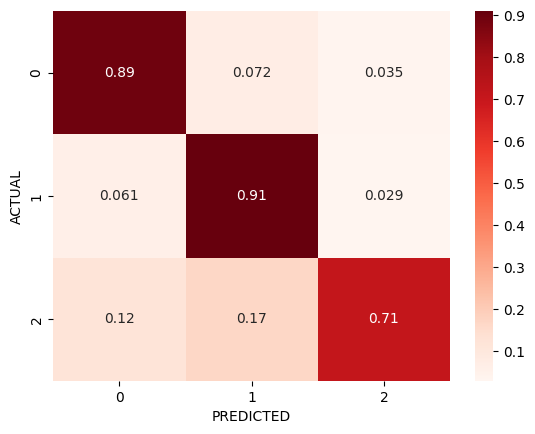

In [59]:
cf = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(cf, annot = True, cmap = 'Reds')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

In [60]:
model.save("sarcasm_model.h5")

In [62]:
model.save("/content/hate_speech")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/hate_speech.